In [1]:
#Source: https://www.youtube.com/watch?v=QIUxPv5PJOY&t=2s

In [2]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#get stock quote
df = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2030-01-01')
#show data
print(df['Close'])

Date
2012-01-03     179.029999
2012-01-04     177.509995
2012-01-05     177.610001
2012-01-06     182.610001
2012-01-09     178.559998
                 ...     
2021-01-13    3165.889893
2021-01-14    3127.469971
2021-01-15    3104.250000
2021-01-19    3120.760010
2021-01-20    3263.379883
Name: Close, Length: 2277, dtype: float64


In [4]:
#get number of rows and columns in df
df.shape

(2277, 6)

<function matplotlib.pyplot.show>

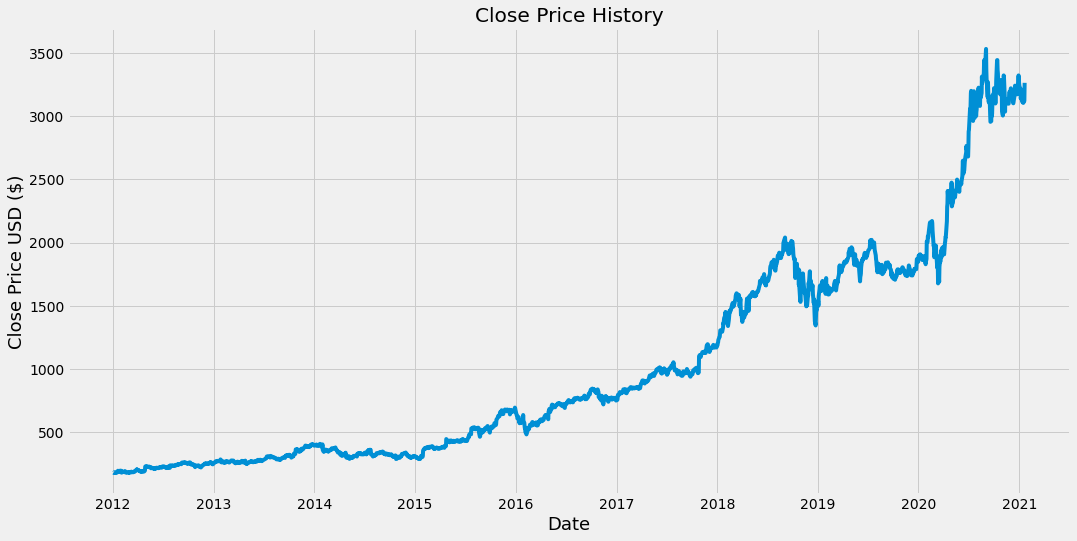

In [5]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [6]:
#new dataframe w/ only 'Close column'
data = df.filter(['Close'])
#convert dataframe to numpy array
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
print(dataset)
print("\n")
training_data_len

[[ 179.02999878]
 [ 177.50999451]
 [ 177.61000061]
 ...
 [3104.25      ]
 [3120.76000977]
 [3263.37988281]]




1822

In [7]:
#scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.23852679e-04],
       [4.70866468e-04],
       [5.00669928e-04],
       ...,
       [8.72687406e-01],
       [8.77607659e-01],
       [9.20110722e-01]])

In [8]:
#create training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00447025, 0.00302785, 0.00329904,
       0.00353746, 0.00518251, 0.00579344, 0.00483383, 0.00551629,
       0.001052  , 0.00172552, 0.00350169, 0.0021487 , 0.00246162,
       0.00284606, 0.00269705, 0.00286394, 0.00466694, 0.00458052,
       0.00254506, 0.00119207, 0.00195797, 0.00188644, 0.00138578,
       0.00088213, 0.00095366, 0.00077484, 0.00234539, 0.00112054,
       0.00122485, 0.00100432, 0.00129041, 0.00153777, 0.00233645,
       0.00348977, 0.00250036, 0.0022232 , 0.00258082, 0.00188644,
       0.00253314, 0.00271791, 0.00285798, 0.00488747, 0.00470866,
       0.00490833, 0.00569509, 0.00802856, 0.00879447, 0.00751896])]
[0.00854711290330825]

[array([0.00092385, 0.00047087, 0.00050067, 0.00199075, 0.00078378,
       0.00101624, 0.00088511, 0.        , 0.00074206, 0.00170764,
       0.0040262 , 0.00551927, 0.00

In [9]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1762, 60, 1)

In [11]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train model
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
 505/1762 [=======>......................] - ETA: 28s - loss: 0.0013

In [ ]:
#create the testing data
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

In [ ]:
#Get the quote
amzn_quote = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2030-01-01')
#create a new dataframe
new_df = amzn_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)